# Clustering

In [84]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch


In [85]:
from matplotlib.colors import ListedColormap

#Custom colors
custom_colors = ['#a7308f', '#e233bc','#ff65c3', '#ff9ecc', '#ffc3e2']

#Creating a colormap from the list of colors
custom_cmap = ListedColormap(custom_colors)

### K-Means

In [86]:
#Loading my dataset
data = pd.read_csv('game_details_with_counts.csv')

#Selecting quantitative columns for PCA
quant_data = data[['min_players', 'max_players', 'min_playtime', 'max_playtime', 
                   'min_age', 'users_rated', 'average_rating', 'category_count', 
                   'mechanic_count']] 

#Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(quant_data)

#Performing PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_data)

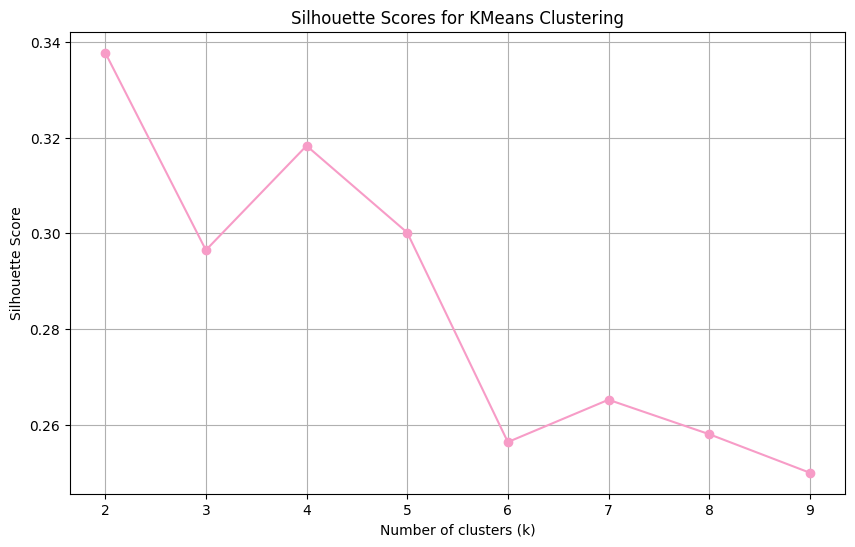

In [87]:
#KMeans Clustering with Silhouette Method
silhouette_scores = []
k_values = range(2, 10)  # Choose a range for k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

#Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='#f79cc7')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_scores.png')
plt.show()



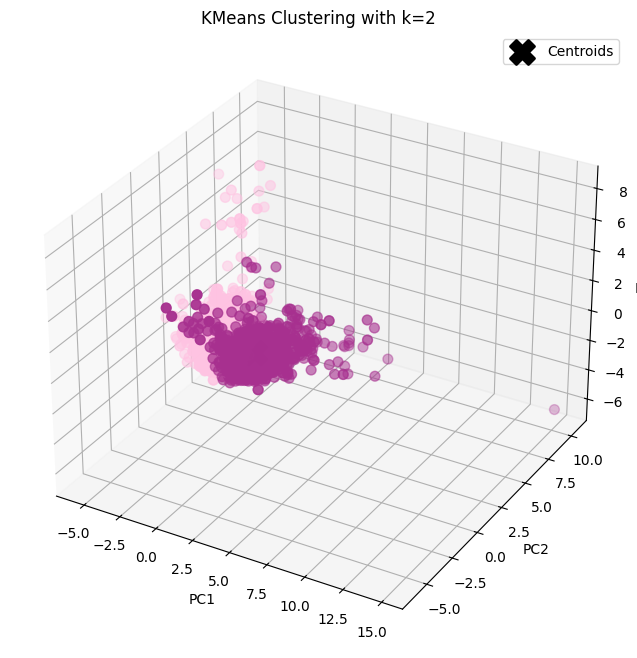

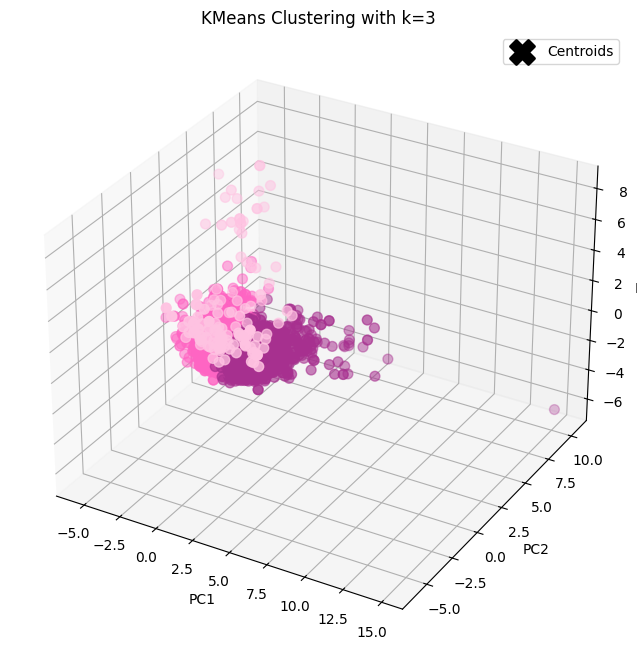

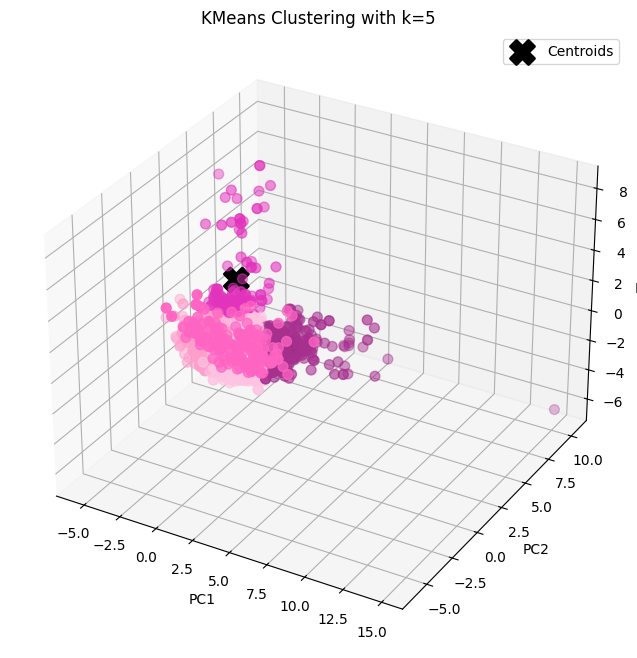

In [88]:
#Choosing three smart values of k from the silhouette score plot
chosen_k_values = [2, 3, 5] 


#Plotting KMeans Clustering Results
for k in chosen_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    centroids = kmeans.cluster_centers_

    #Creating a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
               c=kmeans.labels_, cmap=custom_cmap, s=50)
    
    #Plotting centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='black', marker='X', s=300, edgecolor='black', linewidths=2, alpha=1.0, label='Centroids')
    
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.savefig(f'kmeans_clusters_{k}.png')
    plt.show()





In [89]:
import numpy as np
#take a random sample of 250 data points
#set seed for reproducibility
sample_data = data.sample(250, random_state=11)

#Selecting quantitative columns for PCA
quant_sample_data = sample_data[['min_players', 'max_players', 'min_playtime', 'max_playtime', 
                                 'min_age', 'users_rated', 'average_rating', 'category_count', 
                                 'mechanic_count']]

#Normalizing the data
scaler = StandardScaler()
normalized_sample_data = scaler.fit_transform(quant_sample_data)

#Performing PCA
pca = PCA(n_components=3)
pca_result_sample = pca.fit_transform(normalized_sample_data)

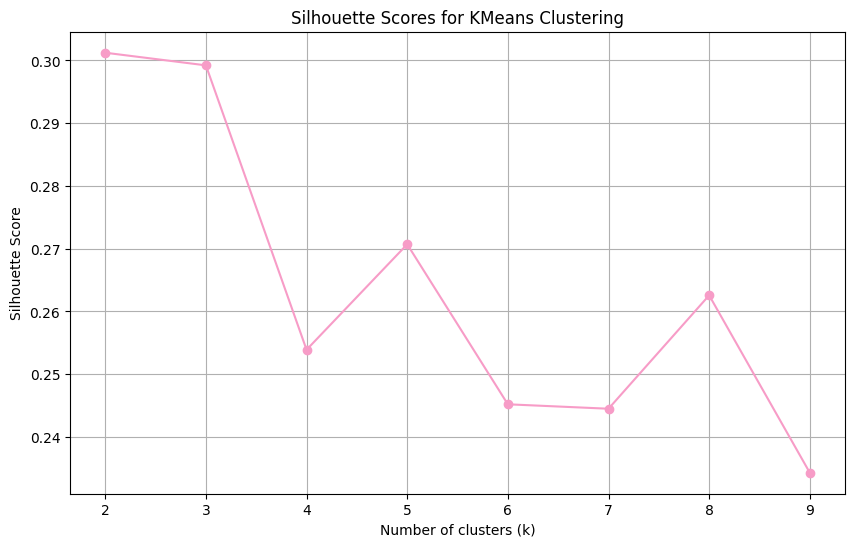

In [90]:
#k means clustering with silhouette method
#set seed for reproducibility
silhouette_scores = []
k_values = range(2, 10)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=33) 
    kmeans.fit(pca_result_sample) 
    score = silhouette_score(pca_result_sample, kmeans.labels_) 
    silhouette_scores.append(score)

#Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='#f79cc7')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_scores_sample.png')
plt.show()


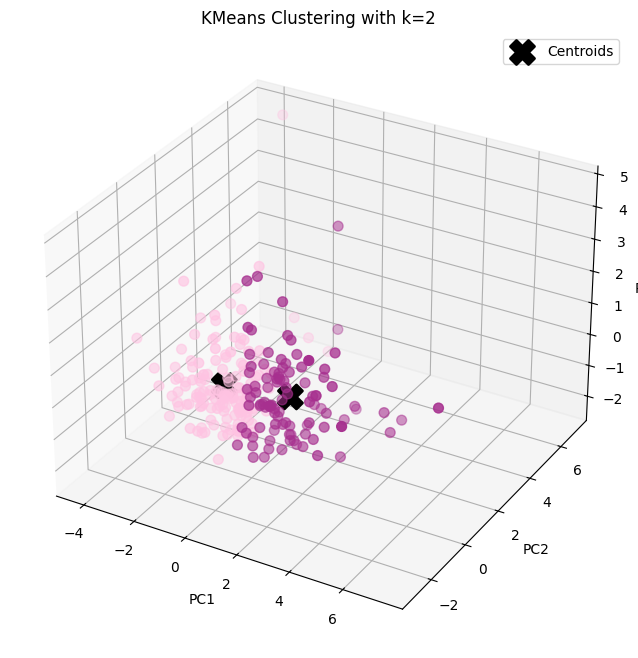

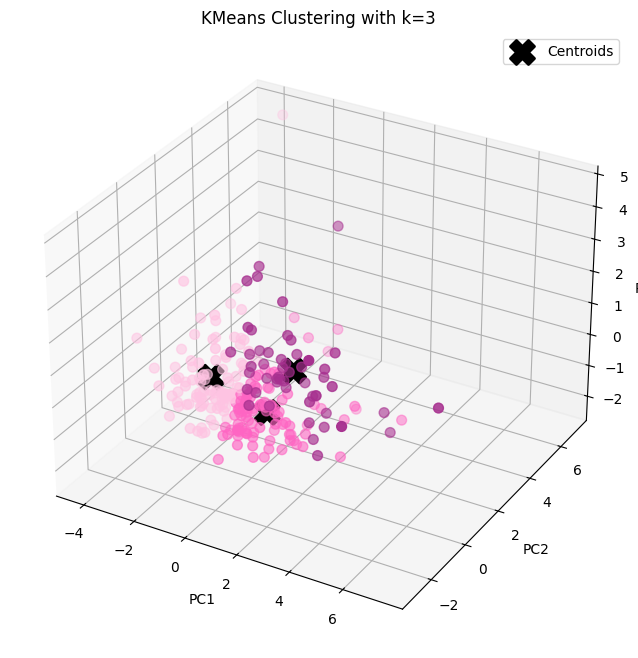

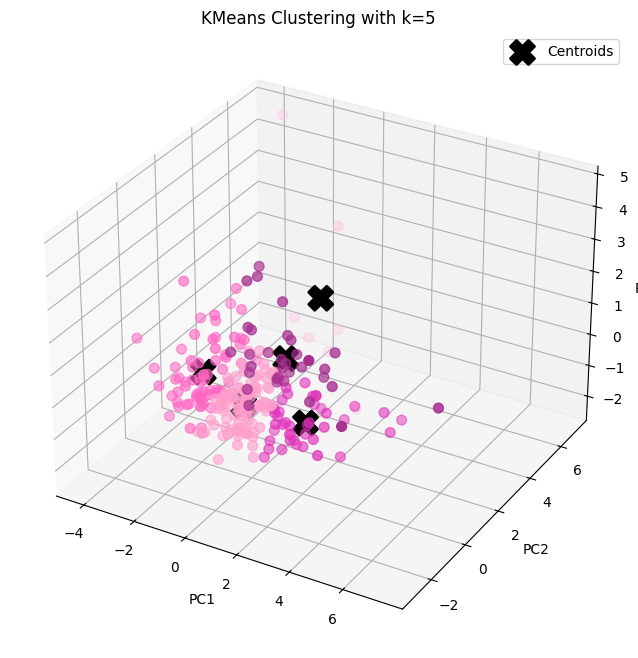

In [91]:
#Choosing three smart values of k from the silhouette score plot
chosen_k_values = [2, 3, 5]

#Plotting KMeans Clustering Results
for k in chosen_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_sample)
    centroids = kmeans.cluster_centers_

    #Creating a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result_sample[:, 0], pca_result_sample[:, 1], pca_result_sample[:, 2], 
               c=kmeans.labels_, cmap=custom_cmap, s=50)
    
    #Plotting centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='black', marker='X', s=300, edgecolor='black', linewidths=2, alpha=1.0, label='Centroids')
    
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.savefig(f'kmeans_clusters_sample_{k}.png')
    plt.show()





In [92]:
#Converting Sampled PCA results back to a DataFrame
pca_df_sample = pd.DataFrame(pca_result_sample, columns=['PC1', 'PC2', 'PC3'])  # Create DataFrame for the sample



### Hierarchial Clustering

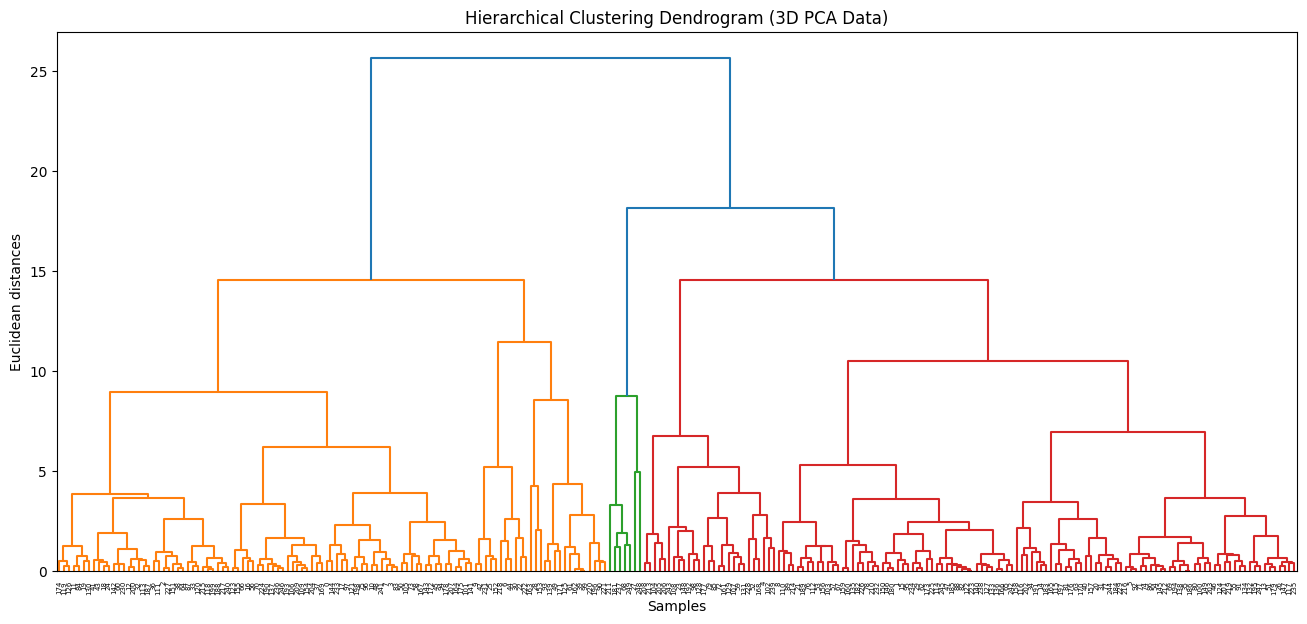

In [93]:
# Hierarchical Clustering with Dendrogram
plt.figure(figsize=(16, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_result_sample[:, :3], method='ward'))  # Use only the first 3 PCA components

ax = plt.gca()
ax.set_facecolor('white')
plt.title('Hierarchical Clustering Dendrogram (3D PCA Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

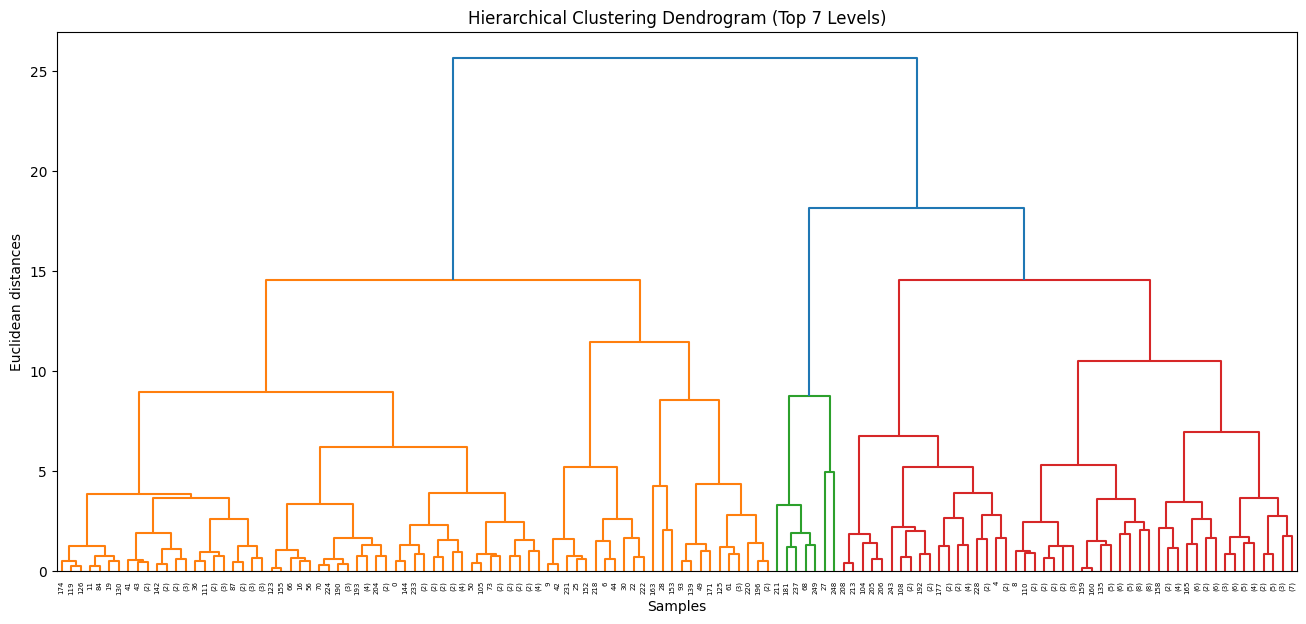

In [94]:
# Hierarchical Clustering with Dendrogram, showing only top 7 levels
plt.figure(figsize=(16, 7))

# Truncate mode is set to 'level' to show only a specified number of levels
dendrogram = sch.dendrogram(
    sch.linkage(pca_result_sample, method='ward'),
    truncate_mode='level',  # Use 'level' mode to truncate the number of levels
    p=7  # Show the top 7 levels
)

ax = plt.gca()
ax.set_facecolor('white')

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram (Top 7 Levels)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

# Show the plot
plt.show()

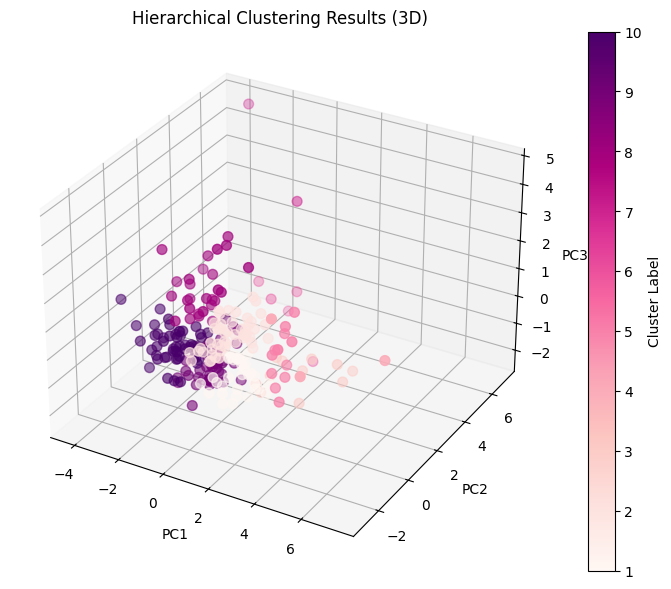

In [99]:
# Cutting the dendrogram to form clusters
max_d = 7  # Example threshold
clusters = sch.fcluster(sch.linkage(pca_result_sample, method='ward'), max_d, criterion='distance')

# Plotting the hierarchical clustering results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and save it in a variable
scatter = ax.scatter(pca_result_sample[:, 0], pca_result_sample[:, 1], pca_result_sample[:, 2], 
                     c=clusters, cmap='RdPu', s=50)

ax.set_title('Hierarchical Clustering Results (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid(True)

# Pass the scatter plot as the mappable to the colorbar
plt.colorbar(scatter, label='Cluster Label')

plt.savefig('hierarchical_clusters_scatter_3D.png')
plt.show()

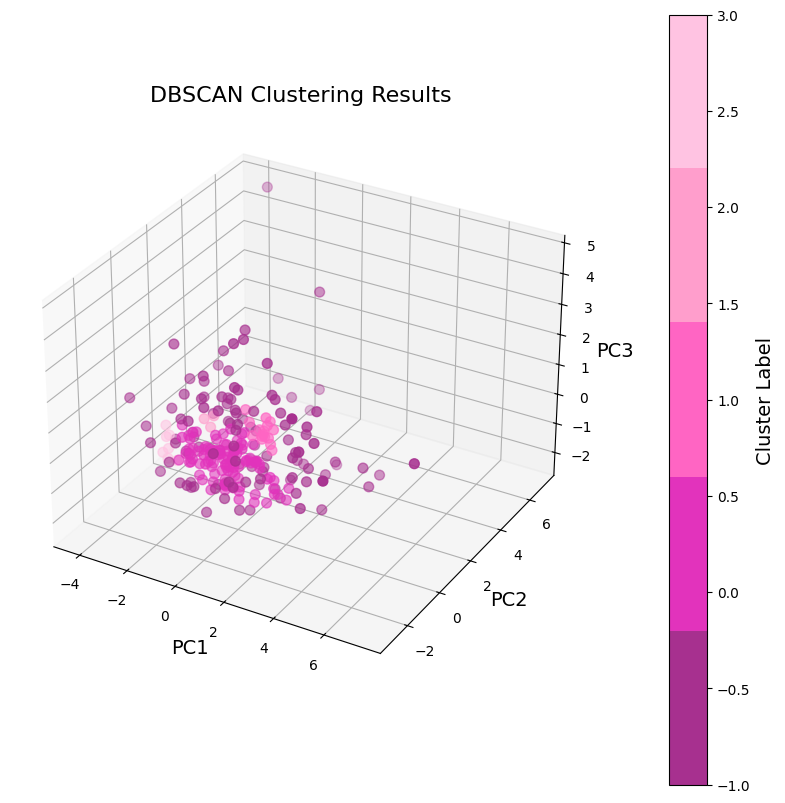

In [104]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_result_sample)

# Plotting DBSCAN results in 3D
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(pca_df_sample['PC1'], pca_df_sample['PC2'], pca_df_sample['PC3'], 
                     c=dbscan_labels, cmap=custom_cmap, s=50)
ax.set_title('DBSCAN Clustering Results', fontsize=16)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)
plt.grid(True)

# Adding a colorbar to indicate cluster labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster Label', fontsize=14)

plt.savefig('dbscan_clusters_3d_scatter.png')
plt.show()





In [97]:
#Comparing DBSCAN with other methods
print("KMeans labels:", kmeans.labels_)
print("DBSCAN labels:", dbscan_labels)

KMeans labels: [0 3 3 3 2 2 1 3 2 1 3 3 1 2 2 3 0 0 1 3 2 3 1 2 1 1 2 4 0 3 1 2 1 1 2 3 3
 1 3 1 2 1 1 1 1 3 2 3 3 0 3 2 2 3 3 2 0 3 3 2 1 1 3 2 1 3 0 3 4 3 0 3 2 0
 3 3 3 2 3 0 3 2 3 3 3 2 3 1 3 3 1 2 2 0 3 3 3 0 2 1 2 3 2 3 0 3 0 2 2 3 3
 1 3 1 3 2 2 2 3 3 1 3 3 0 2 0 3 3 2 2 3 2 3 3 2 3 3 0 3 0 3 3 1 3 0 3 3 2
 2 3 3 1 1 0 3 0 2 2 2 2 2 2 1 0 3 2 3 0 2 1 2 0 3 3 3 3 2 2 3 2 3 4 3 2 2
 3 3 1 3 3 0 2 2 3 3 3 1 2 3 3 1 2 2 2 1 0 0 3 0 3 3 4 3 0 3 3 2 3 1 2 1 1
 1 3 0 1 2 3 0 2 1 1 3 3 3 2 0 4 3 2 3 3 3 2 2 3 0 2 4 4]
DBSCAN labels: [-1 -1 -1 ...  3  3  3]
